$\DeclareMathOperator{\d}{d}$
$\newcommand{\err}[3]{\Delta #1 =& #1\cdot\sqrt{\lr{\frac{\Delta #2}{#2}}^2 + \lr{\frac{\Delta #3}{#3}}^2}}$
$\newcommand{\lr}[1]{\left(#1\right)}$

# Protokoll PAP2 Versuch 251:Statistik

Leonard Scheuer

## Motivation
In diesem Versuch soll die statistische Natur des radioaktiven Zerfalls betrachtet werden. Vor allem soll sich mit dem Geiger-Müller-Zähler vertraut gemacht werden. 

## Grundlagen
### Geiger-Müller-Zähler

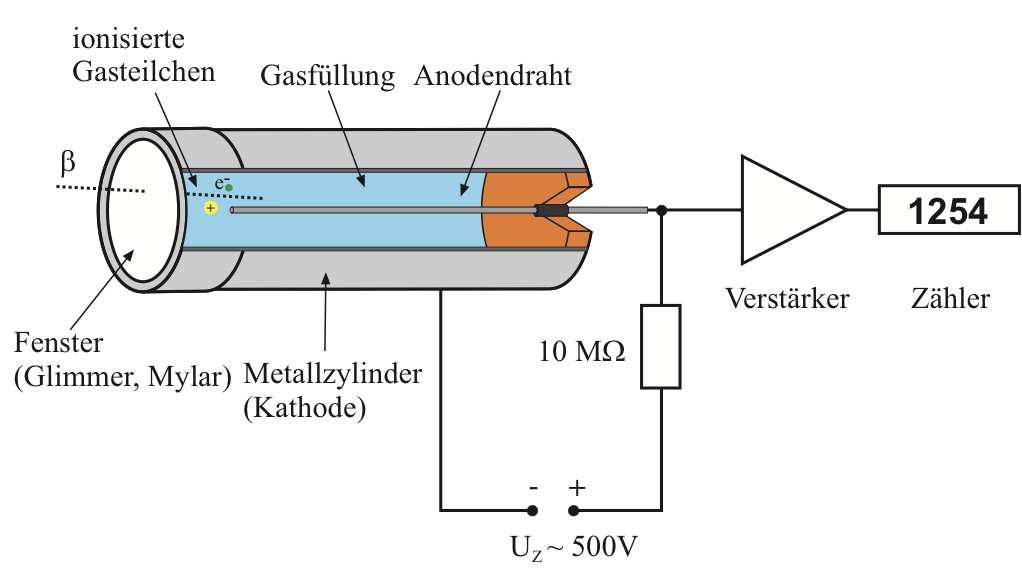
Abb.1: Fensterzählrohr

Mit dem GMZ lässt sich ionisierende Strahlung nachweisen. Das Zählrohr ist mit ionisierbarem Gas gefüllt, es wird eine Spannung angelegt, sodass die bei einer Ionisation freiwerdenen Elektronen beschleunigt werden und eine Elektronenlawine im Gas auslösen. Der Strom wird gemessen und damit das Ereignis registiert. 
Je nach angelegter Spannung erreichen nicht alle Primärelektronen diesen Effekt/ die Anode. Im Proportionalitätsbereich gelangen alle Elektronen an die Anode, jedoch werden kein Sekundärelektronen erzeigt, der Strom ist hier prop. zur Energie der Eintreffenen Strahlung. Bei höherer Spannung wird wie oben beschrieben stets eine Elektronenlawine ausgelöst. Ein Hemmgas sorgt dafür, dass diese Wieder abklingt. Der Strom ist dann nicht mehr auskunftfähig für die Energie. In diesem Bereich, dem Plateaubereich (s. Abb.) messen wir die Ereignisse. Nach dem Auslösen kann der GMZ für die "Totzeit" kein Ereigniss messen, da die Kammer noch nicht wieder im Ausgangszustand ist und noch Elektronen zur Anode driften. Wird die Spannung noch weiter erhöht, so treten Gasentladungen auf und der Zähler ist unbrauchbar zum Zählen von Strahlungsereignissen.

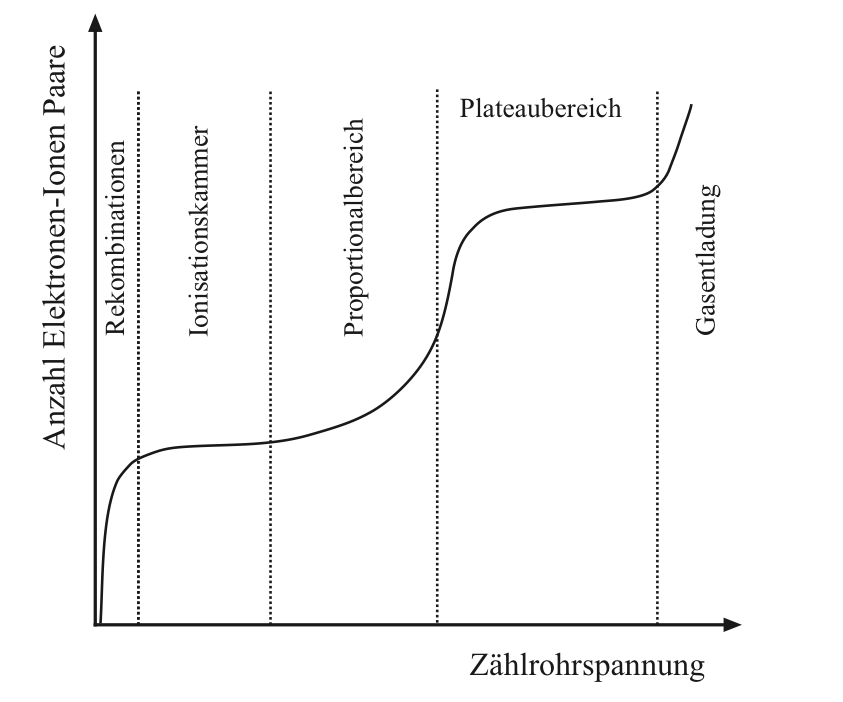
Abb. 2: Zählrohrcharakteristik (Quelle: Script)

### Wahrscheinlichkeitsverteilungen
Wir wollen im Folgenden drei für uns relevante Wahrscheinlichkeitsverteilungen einführen.
#### Binominalverteilung
Für ein Ereignis A mit Wahrscheinlichkeit $p$ fragen wir, wie Wahrscheinlich es ist bei $n$ Versuchen A $k$ mal zu erhalten. Es lässt sich finden:
\begin{align}
	B(k;n,p) = \binom{n}{ k} p^k(1-p)^{n-k}
\end{align}
Daraus lässt sich finden:
\begin{align}
	&\sum\limits_{k=0}^nB(k;n,p) = 1\\
	&\mu  = n\cdot p\\
	&\sigma = \sqrt{np(1-p)}
\end{align}

Im Falle des radioaktiven Zerfalls erhalten wir:
\begin{align}
	p(t) = 1-e^{- \lambda t}
\end{align}
wobei $\lambda$ die Zerfsllskonstante ist, abhängig vom zerfallenden Objekt. Ist die Zerfallskonstate klein, wie im Versuch, so können wir diese als Konstant während den Messungen annehmen. Für kleine $p$ und große $n$ können wir die Verteilung durch die Poisson-Verteilung sehr gut approximieren. 

#### Poisson-Verteilung
Hier ist
\begin{align}
	P(k; \mu) = \frac{\mu^k e^{-\mu}}{k!}
\end{align}
Dabei ist $\mu=np$, für die Standardabweichung gilt:
\begin{align}
	\sigma = \sqrt{\mu}
\end{align}

Für große $\mu$ geht die Poisson-Verteilung in die Gaußverteilung mit mit $\sigma = \sqrt{\mu}$ über. 

#### Gaußverteilung
Die Gaußverteilung mit mit $\sigma = \sqrt{\mu}$  ist im Gegensatz zu den beiden vorherigen kontinuierlich:
\begin{align}
	G(k; \mu) = \frac 1{\sqrt{2\pi\mu}}e^{-\frac{\lr{\mu - k}^2}{2 \mu}}
\end{align}
Die Breite der Verteilung an halbem Maximum (FWHM) ist:
\begin{align}
	FWHM\approx 2.4 \sigma
\end{align}
Dies kann gut zum Abschätzen einer Gaußverteilung nutzen. 

### Material
- Geiger-Müller Zählrohr mit Betriebsgerät
- Externer Impulszähler
- PC mit Drucker
- Präparatehalterung mit Bleiabschirmung
- Radioaktives Präparat ($^{60}$Co)

### Durchführung
#### 1 Zählrohrcharakteristik
Wir wollen den Plateaubereich des GMZ finden. Dafür wird der Zähler auf den Lautsprecher geschaltet und die Hochspannung erhöht, bis ein sprungartig einsetzendes Signal zu vernehmen ist. Dann wird in 25V-Schritten der Bereich der darüberliegenden 150V in der Zählrate vermessen. Die Mitte des gefundenen Plateaus sei $U_0$. Um den Anstieg zu messen, wird das Präperat nahe an das Zählrohr gebracht und die Zählraten (Torzeit 3 Minuten) von $U_0$ und $U_0 +100V$ gemessen.

#### 2 Verifizierung der statistischen Natur des radioaktiven Zerfalls
(a)Das Präperat wird so plaziert, dass bei einer Torzeit von 1 Minute etwa 140 bis 150 Zerfälle gemessen werden. Nun wird (per Computer) 2000 mal die Zählrate für 500ms gemessen. 

(b) Das Präperat wird so plaziert, dass bei einer Torzeit von 1 Sekunde etwa 45 bis 50 Zerfälle gemessen werden. Nun wird (per Computer) 5000 mal die Zählrate für 100ms gemessen. 

## Messdaten
Siehe Anhang und Plots in der Auswertung.

## Auswertung
Wir haben zunächst das Zählrohr vermessen. Dazu fitten wir eine Gerade duch das Plateau und wählen $U_0$ als den Mittelpunkt des Bereiches. Wir untersuchen (Aufgabe 2), wie sich die Zählraten bei $U_0$ und $U_0+100V$ unterscheiden in den ein bzw. drei Minuten Zeitrahmen. 

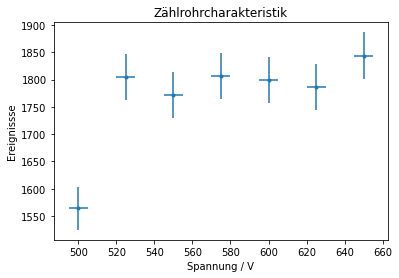

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from numpy import exp, pi, sqrt
from scipy.special import gamma
from scipy.stats import chi2

U, U_err, N = np.genfromtxt('251-1.csv', delimiter=";", unpack = True)
N_err = np.sqrt(N)

plt.errorbar(U, N, yerr = N_err, xerr = U_err, fmt=".")
plt.xlabel('Spannung / V')
plt.ylabel('Ereignissse')
_ = plt.title('Zählrohrcharakteristik')

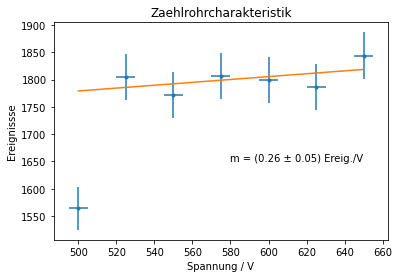

In [2]:
def linear(x,a,b):
    return a*x + b

popt, pcov = curve_fit(linear, U[1:], N[1:], sigma = N_err[1:])

plt.errorbar(U, N, N_err, xerr = U_err, fmt=".")
plt.xlabel('Spannung / V')
plt.ylabel('Ereignissse')
plt.title('Zaehlrohrcharakteristik')
plt.plot(U, linear(U,*popt))
plt.text(580, 1650, 'm = ({0:.2f} ± {1:.2f}) Ereig./V'.format(popt[0],pcov[0][0]))
plt.savefig("251-1.jpeg")

In [3]:
#Auswertung Aufgabe 2

n_1 = np.array([6951, 7276])
n_3 = np.array([20878, 22197])

del_n_1 = np.diff(n_1)[0]
del_n_3 = np.diff(n_3)[0]

del_n_1_err = sqrt(np.sum(n_1))
del_n_3_err = sqrt(np.sum(n_3))

print('1 Minute:')
print('Anstieg um ({0} ± {1}) Ereignisse'.format(round(del_n_1, -1), int(round(del_n_1_err, -1))))
print('Prozentual: ({0:.1f} ± {1:.1f})%'.format(del_n_1 / n_1[0] * 10**2, n_1[1] / n_1[0] * sqrt(np.sum(1 / n_1)) * 10**2))
print('Der Anstieg ist somit nicht signifikant, da die beiden Messwerte um {0:.1f} σ abweichen.'.format(del_n_1 / del_n_1_err))
print('')
print('3 Minuten:')
print('Anstieg um ({0} ± {1}) Ereignisse'.format(round(del_n_3, -1), int(round(del_n_3_err, -1))))
print('Prozentual: ({0:.1f} ± {1:.1f})%'.format(del_n_3 / n_3[0] * 10**2, n_3[1] / n_3[0] * sqrt(np.sum(1 / n_3)) * 10**2))
print('Der Anstieg ist somit signifikant, da die beiden Messwerte um {0:.1f} σ abweichen.'.format(del_n_3 / del_n_3_err))

1 Minute:
Anstieg um (320 ± 120) Ereignisse
Prozentual: (4.7 ± 1.8)%
Der Anstieg ist somit nicht signifikant, da die beiden Messwerte um 2.7 σ abweichen.

3 Minuten:
Anstieg um (1320 ± 210) Ereignisse
Prozentual: (6.3 ± 1.0)%
Der Anstieg ist somit signifikant, da die beiden Messwerte um 6.4 σ abweichen.


In [4]:
k_0 = (n_3[0] - n_1[0]) / 2 * 60 #in h
k_0_err = sqrt(n_3[0] + n_1[0]) / 2 * 60

k_100 = (n_3[1] - n_1[1]) / 2 * 60
k_100_err = sqrt(n_3[1] + n_1[1]) / 2 * 60

t = 10**4 * (k_100 + k_0) / (k_100 - k_0)**2
t_err = 10**4 * sqrt(((k_100 + 3 * k_0)**2 * k_100_err**2 + (k_0 + 3 * k_100)**2 * k_0_err**2) / (k_100 - k_0)**6)

print('Messzeit um Plateau-Anstieg auf 1% genau zu kennen: ({0:.0f} ± {1:.0f})h'.format(t, t_err))

Messzeit um Plateau-Anstieg auf 1% genau zu kennen: (10 ± 5)h


In [5]:
print('1 Minute:')
print('Mögliche prozentuelle Abweichung des Messwertes bei U_0+100V\nvom Messwert bei U_0 bei einem Vertrauensniveau bei 68%: {0:.2f}%'.format(10**2 / sqrt(n_1[0])))
print('Mögliche prozentuelle Abweichung des Messwertes bei U_0+100V\nvom Messwert bei U_0 bei einem Vertrauensniveau bei 95%: {0:.2f}%'.format(10**2 * 2 / sqrt(n_1[0])))

print('')

print('3 Minuten:')
print('Mögliche prozentuelle Abweichung des Messwertes bei U_0+100V\nvom Messwert bei U_0 bei einem Vertrauensniveau bei 68%: {0:.2f}%'.format(10**2 / sqrt(n_3[0])))
print('Mögliche prozentuelle Abweichung des Messwertes bei U_0+100V\nvom Messwert bei U_0 bei einem Vertrauensniveau bei 95%: {0:.2f}%'.format(10**2 * 2 / sqrt(n_3[0])))

1 Minute:
Mögliche prozentuelle Abweichung des Messwertes bei U_0+100V
vom Messwert bei U_0 bei einem Vertrauensniveau bei 68%: 1.20%
Mögliche prozentuelle Abweichung des Messwertes bei U_0+100V
vom Messwert bei U_0 bei einem Vertrauensniveau bei 95%: 2.40%

3 Minuten:
Mögliche prozentuelle Abweichung des Messwertes bei U_0+100V
vom Messwert bei U_0 bei einem Vertrauensniveau bei 68%: 0.69%
Mögliche prozentuelle Abweichung des Messwertes bei U_0+100V
vom Messwert bei U_0 bei einem Vertrauensniveau bei 95%: 1.38%


Wir stellen die Zerfallshäufigkeiten (gemessen in 2a)) dar und fitten Poisson und Gauß an:

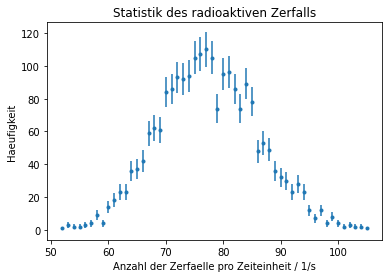

In [6]:
anzahl, haeufigkeit = np.loadtxt('251-2.dat', unpack=True)
fehler = sqrt(haeufigkeit)

plt.errorbar(anzahl, haeufigkeit, fehler, fmt=".")
plt.xlabel('Anzahl der Zerfaelle pro Zeiteinheit / 1/s')
plt.ylabel('Haeufigkeit')
_ = plt.title('Statistik des radioaktiven Zerfalls')

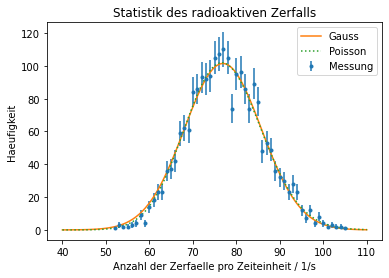

In [7]:
def gaussian(x, A, mu, sig): #A: Flaeche der Gaussfunktion
    return A/(sqrt(2*pi)*sig)*exp(-(x-mu)**2/2/sig**2)

popt, pcov = curve_fit(gaussian,anzahl[12:-12], haeufigkeit[12:-12], p0 = [2000,75,8], sigma = fehler[12:-12])

def poisson(x, A_p, mu_p):
    return A_p*exp(-mu_p)*mu_p**x/gamma(x+1)

popt_p, pcov_p = curve_fit(poisson, anzahl[12:-12], haeufigkeit[12:-12], p0=[2000, 75], sigma=fehler[12:-12])

plt.errorbar(anzahl, haeufigkeit, fehler, fmt=".",label='Messung')
plt.xlabel('Anzahl der Zerfaelle pro Zeiteinheit / 1/s')
plt.ylabel('Haeufigkeit')
plt.title('Statistik des radioaktiven Zerfalls')
x = np.linspace(40,110, 100)
plt.plot(x, gaussian(x,*popt), label='Gauss')
plt.plot(x, poisson(x,*popt_p), label='Poisson',linestyle=':')
plt.legend()
plt.savefig("251-2.jpeg")


In [8]:
print("Gaussfit:")
print("A = ({0} ± {1})/s".format(int(round(popt[0],-1)), int(round(sqrt(pcov[0][0]), -1))))
print("mu = ({0:.2f} ± {1:.2f})/s".format(popt[1], sqrt(pcov[1][1])))
print("sig = ({0:.2f} ± {1:.2f})/s".format(popt[2], sqrt(pcov[2][2])))
print('')
print("Poissonfit:")
print("A_p = ({0} ± {1})/s".format(int(round(popt_p[0],-1)), int(round(sqrt(pcov_p[0][0]), -1))))
print("mu_p = ({0:.2f} ± {1:.2f})/s".format(popt_p[1], sqrt(pcov_p[1][1])))

Gaussfit:
A = (2250 ± 50)/s
mu = (76.91 ± 0.24)/s
sig = (8.86 ± 0.27)/s

Poissonfit:
A_p = (2240 ± 50)/s
mu_p = (77.18 ± 0.22)/s


In [9]:
#Gauss:
chi2_g = np.sum((gaussian(anzahl[12:-12],*popt) - haeufigkeit[12:-12])**2 / fehler[12:-12]**2)
dof_g = len(anzahl[12:-12]) - 3 #dof:degrees of freedom, Freiheitsgrad
chi2_red_g = chi2_g/dof_g
print("chi2 gauß = {0:.2f}".format(chi2_g))
print("chi2_red gauß = {0:.2f}".format(chi2_red_g))

#Poisson:
chi2_p = np.sum((poisson(anzahl[12:-12],*popt_p) - haeufigkeit[12:-12])**2 / fehler[12:-12]**2)
dof_p = len(anzahl[12:-12])-2 #poisson hat nur 2 Parameter
chi2_red_p = chi2_p/dof_p
print("chi2 poisson = {0:.2f}".format(chi2_p))
print("chi2_red poisson = {0:.2f}".format(chi2_red_p))

chi2 gauß = 25.19
chi2_red gauß = 0.93
chi2 poisson = 24.25
chi2_red poisson = 0.87


In [10]:
#Gauss:
prob_g = round(1-chi2.cdf(chi2_g,dof_g),2) * 100

#Poisson:
prob_p=round(1-chi2.cdf(chi2_p,dof_p),2) * 100

print("Wahrscheinlichkeit Gauss = {0:.1f}%".format(prob_g))
print("Wahrscheinlichkeit Poisson = {0:.1f}%".format(prob_p))

Wahrscheinlichkeit Gauss = 56.0%
Wahrscheinlichkeit Poisson = 67.0%


Wir wiederholen dies für die Messungen aus 2b):

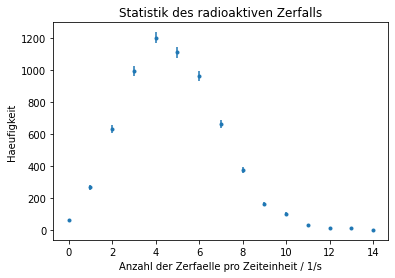

In [11]:
anzahl, haeufigkeit = np.loadtxt('251-3.dat', unpack=True)
fehler = sqrt(haeufigkeit)

plt.errorbar(anzahl, haeufigkeit, fehler, fmt=".")
plt.xlabel('Anzahl der Zerfaelle pro Zeiteinheit / 1/s')
plt.ylabel('Haeufigkeit')
_ = plt.title('Statistik des radioaktiven Zerfalls')

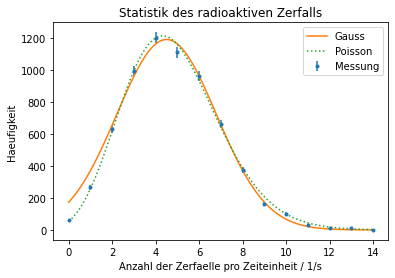

In [12]:
popt, pcov = curve_fit(gaussian, anzahl[2:-6], haeufigkeit[2:-6], p0 = [200, 4, 1], sigma = fehler[2:-6])
popt_p, pcov_p = curve_fit(poisson, anzahl[2:-6], haeufigkeit[2:-6], p0=[200, 4], sigma=fehler[2:-6])

plt.errorbar(anzahl, haeufigkeit, fehler, fmt=".",label='Messung')
plt.xlabel('Anzahl der Zerfaelle pro Zeiteinheit / 1/s')
plt.ylabel('Haeufigkeit')
plt.title('Statistik des radioaktiven Zerfalls')
x = np.linspace(0, 14, 100)
plt.plot(x, gaussian(x,*popt), label='Gauss')
plt.plot(x, poisson(x,*popt_p), label='Poisson',linestyle=':')
#plt.yscale('log')
plt.legend()
plt.savefig("251-3.jpeg")


In [13]:
print("Gaussfit:")
print("A = ({0} ± {1})/s".format(int(round(popt[0],-1)), int(round(sqrt(pcov[0][0]), -1))))
print("mu = ({0:.2f} ± {1:.2f})/s".format(popt[1], sqrt(pcov[1][1])))
print("sig = ({0:.2f} ± {1:.2f})/s".format(popt[2], sqrt(pcov[2][2])))
print('')
print("Poissonfit:")
print("A_p = ({0} ± {1})/s".format(int(round(popt_p[0],-1)), int(round(sqrt(pcov_p[0][0]), -1))))
print("mu_p = ({0:.2f} ± {1:.2f})/s".format(popt_p[1], sqrt(pcov_p[1][1])))

Gaussfit:
A = (6840 ± 140)/s
mu = (4.50 ± 0.05)/s
sig = (2.29 ± 0.06)/s

Poissonfit:
A_p = (6620 ± 80)/s
mu_p = (4.83 ± 0.03)/s


In [14]:
#Gauss:
chi2_g = np.sum((gaussian(anzahl[2:-6],*popt) - haeufigkeit[2:-6])**2 / fehler[2:-6]**2)
dof_g = len(anzahl[2:-6]) - 3 #dof:degrees of freedom, Freiheitsgrad
chi2_red_g = chi2_g/dof_g
print("chi2 gauß = {0:.2f}".format(chi2_g))
print("chi2_red gauß = {0:.2f}".format(chi2_red_g))

#Poisson:
chi2_p = np.sum((poisson(anzahl[2:-6],*popt_p) - haeufigkeit[2:-6])**2 / fehler[2:-6]**2)
dof_p = len(anzahl[2:-6]) - 2 #poisson hat nur 2 Parameter
chi2_red_p = chi2_p/dof_p
print("chi2 poisson = {0:.2f}".format(chi2_p))
print("chi2_red poisson= {0:.2f}".format(chi2_red_p))

chi2 gauß = 6.23
chi2_red gauß = 1.56
chi2 poisson = 4.21
chi2_red poisson= 0.84


In [15]:
#Gauss:
prob_g = round(1-chi2.cdf(chi2_g,dof_g),2) * 100

#Poisson:
prob_p=round(1-chi2.cdf(chi2_p,dof_p),2) * 100

print("Wahrscheinlichkeit Gauss = {0:.1f}%".format(prob_g))
print("Wahrscheinlichkeit Poisson = {0:.1f}%".format(prob_p))

Wahrscheinlichkeit Gauss = 18.0%
Wahrscheinlichkeit Poisson = 52.0%


## Diskussion

In diesem Versuch haben wir die statistische Natur des radioaktiven Zerfalls beobachten können. Auch haben wir die Charakteristik eines Geiger-Müller-Zählrohrs aufgenommen. Der Plateauanstieg ist im 3-Minuten-Messzeitraum signifikant sichtbar, jedoch noch nicht im 1-Minute-Messzeitraum. 

Für die tatsächlichen Zerfälle des Präperats bei hohen Messraten (Präperat nahe) finden wir gute Fitwahrscheinlichkeiten mit chi2-reduziert nahe 1 (Poisson 0,84; Gauß 0,94). Wir konnten also sehen, dass hier also, wie Eingangs argumentiert, Gauß und Possion gute Näherung ergeben. Bei kleineren Zählraten finden wir die Possionverteilung wieder in einigermaßen guter Übereinstimmung zu den Daten (chi2-red 0,84), die Gaußverteilung jedoch nichtmehr (chi2-red 1,56, Fitwahrscheinlichkeit 18%).  

Schlussendlich konnten also alle zu beobachtenen Effekte gut sichtbar gemacht werden.